# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [166]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
import zipfile
with zipfile.ZipFile('../datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [61]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [62]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [63]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, fbeta_score
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [91]:
accuracy_score(y_pred, y_test)

0.9943052802306722

In [92]:
f1_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [93]:
fbeta_score(y_test, y_pred, beta=0.10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [191]:
confusion_matrix(y_test, y_pred)

array([[27587,     0],
       [  158,     0]], dtype=int64)

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [23]:
#cualquier cantidad de undersampling
#solo undersampling a TRAIN
#Evaluo TEST
#CROSS VALIDATION
# PARTO BASE PARA KFOLD
# EN CADA TRAIN DE FOLD HAGO BALANCEO

In [146]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
plt.style.use('ggplot')

In [135]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [136]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

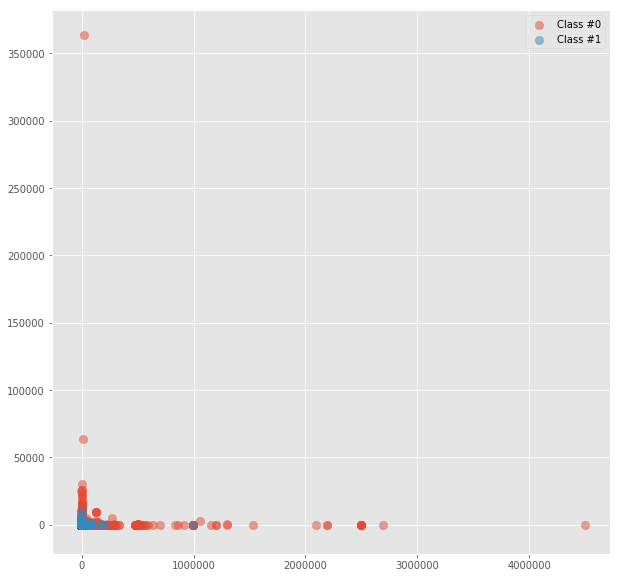

In [202]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

plot_two_classes(x_vis, y_train)

In [205]:
print('y.shape = ',y_train.shape[0], 'y.mean() = ', y_train.mean())

y.shape =  89892 y.mean() =  0.006407689227072487


In [ ]:
#SE EVIDENCIA QUE LA VARIABLE Y ESTA DESBALANCEADA

In [203]:
# HACEMOS KFOLD CROSS VALIDATION CON  UNDERSAMPLING EN CADA ITERACION

In [197]:
#KFOLD - UNDERSAMPLING
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)
# Create k-folds
kf = KFold(X_train.shape[0], n_folds=10, random_state=0)  #VARIO 10 DEPENDE LO DEMORADO (TAMAÑO) DEL MODELO 

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rus = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
    
    
    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    results.append(metrics.accuracy_score(y_test, y_pred_class))

In [206]:
pd.Series(results).describe()

count    10.000000
mean      0.994043
std       0.005560
min       0.983480
25%       0.992866
50%       0.996446
75%       0.998123
max       0.998799
dtype: float64

In [ ]:
#EL RESULTADO ARROJA UN MUY BUEN RESULTADO (ACCURACY= 0,99 EN PROMEDIO)
#SIN EMBARGO ES PERTINENTE VALIDAR LA PREDICCION

In [204]:
f1_score(y_test, y_pred_class)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [207]:
fbeta_score(y_pred_class, y_test, beta=0.10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [209]:
confusion_matrix(y_pred_class, y_test)

array([[9970,   17],
       [   0,    0]], dtype=int64)

In [ ]:
#SE EVIDENCIA QUE AUNQUE SE HACE UNDERSAMPLING, NO ES MUY BUEN PREDICTOR 

# Exercice 04.3

Now using random-over-sampling

In [211]:
#KFOLD
from sklearn.cross_validation import KFold
# Create k-folds
kf = KFold(X_train.shape[0], n_folds=5, random_state=0)  #VARIO 10 DEPENDE LO DEMORADO (TAMAÑO) DEL MODELO 

resultsov = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rus = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
    
    
    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_classov = logreg.predict(X_test)

    # calculate testing accuracy
    resultsov.append(metrics.accuracy_score(y_test, y_pred_classov))

In [212]:
pd.Series(resultsov).describe()

count    5.000000
mean     0.993395
std      0.005598
min      0.984496
25%      0.992699
50%      0.993465
75%      0.997775
max      0.998540
dtype: float64

In [213]:
accuracy_score(y_pred_classov, y_test)

0.997774996523432

In [214]:
f1_score(y_pred_classov, y_test)

0.0

In [215]:
fbeta_score(y_pred_classov, y_test, beta=0.10)

0.0

In [216]:
confusion_matrix(y_pred_classov, y_test)

array([[14350,    30],
       [    2,     0]], dtype=int64)

In [ ]:
#SE EVIDENCIA QUE AUNQUE SE HACE OVERSAMPLING, NO ES MUY BUEN PREDICTOR 

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [ ]:
#NO HAY QUE HACERLO PERO TIENE BONO

In [178]:
from imblearn.over_sampling import SMOTE

In [182]:
sm = SMOTE(random_state=42)
X_smo, y_smo = sm.fit_sample(X_train, y_train)

In [183]:
logregSmo = LogisticRegression(C=1e9)
logregSmo.fit(X_smo, y_smo)
y_predSmo = logreg.predict(X_test)

In [184]:
accuracy_score(y_predSmo, y_test)

0.9943052802306722

In [185]:
f1_score(y_predO, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [187]:
fbeta_score(y_predSmo, y_test, beta=0.10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [188]:
confusion_matrix(y_predSmo, y_test)

array([[27587,   158],
       [    0,     0]], dtype=int64)

In [ ]:
#DE IGUAL MANERA QUE CON UNDERSAMPLING Y OVERSAMPLING, AL HACER SMOTE TAMPOCO SE OBTIENE UNA BUENA PREDICCION

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#IMPUTO PRIMERO A TRAIN E IMPUTO TEST

In [217]:
models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier()}
for model in models.keys():
    models[model].fit(X_train, y_train)

In [219]:
# predict test for each model
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [224]:
y_pred.head()

,lr,dt,nb,nn
57531,0,0,0,0
57532,0,0,0,0
57533,0,0,0,0
57534,0,0,0,0
57535,0,0,0,0


In [240]:
resultmod = pd.DataFrame(index=['Accuracy','F1_Score','F_Beta'], columns=models.keys())
for model in models.keys():
    print(model, {'Accuracy': accuracy_score(y_pred[model], y_test),
                        'F1_Score':f1_score(y_pred[model], y_test),
                        'F_Beta':fbeta_score(y_pred[model], y_test, beta=0.10)})


lr {'Accuracy': 0.9973578083715756, 'F1_Score': 0.0, 'F_Beta': 0.0}
dt {'Accuracy': 0.9924906132665833, 'F1_Score': 0.03571428571428571, 'F_Beta': 0.06554185593770279}
nb {'Accuracy': 0.9854679460436657, 'F1_Score': 0.0, 'F_Beta': 0.0}
nn {'Accuracy': 0.9978445278820748, 'F1_Score': 0.0, 'F_Beta': 0.0}


In [242]:
#SEGUN LOS RESULTADOS, DecisionTreeClassifier fue el mejor al tener un F1_Score de 0.035

In [244]:
confusion_matrix(y_pred['dt'], y_test)

array([[14272,    28],
       [   80,     2]], dtype=int64)

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
clf.fit(X_resampled, y_resampled)
y_pred_rfc = clf.predict(X_test)


In [254]:
print( {'Accuracy': accuracy_score(y_pred_rfc, y_test),
                        'F1_Score':f1_score(y_pred_rfc, y_test),
                        'F_Beta':fbeta_score(y_pred_rfc, y_test, beta=0.10)})

{'Accuracy': 0.8550271172298707, 'F1_Score': 0.007615421227986671, 'F_Beta': 0.15933740879510944}


In [257]:
clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)
clf.fit(X_resampled, y_resampled)
y_pred_rfc = clf.predict(X_test)

In [258]:
print( {'Accuracy': accuracy_score(y_pred_rfc, y_test),
                        'F1_Score':f1_score(y_pred_rfc, y_test),
                        'F_Beta':fbeta_score(y_pred_rfc, y_test, beta=0.10)})

{'Accuracy': 0.8982060909470171, 'F1_Score': 0.010810810810810808, 'F_Beta': 0.18157303370786518}


In [ ]:
#es mucho mejor predictor el random forest classifier con un mayor numero de n_estimators